<a href="https://colab.research.google.com/github/pripalazzo/Estatistica-com-R/blob/main/Analise_Estat%C3%ADsticaR_Intervalo_de_Confianca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estatística com R - Colab 
**Autora**: P. P

**Data:** Maio de 2022

**Laboratório - IGTI - Ciência de Dados**

*   # Intervalo de confiança para média amostral pela distribuição Normal Padrão
*   # Intervalo de confiança para a média amostral pela distribuição t de Student
*   # Intervalo de confiança para a proporção
*   # Intervalo de confiança para média via Bootstrap


# Intervalo de confiança para média amostral pela distribuição Normal Padrão

In [23]:
# Obter o intervalo de confiança para uma variável cuja média = 30, desvio padrão = 7,31 e n = 30
# Temos que definir o nível de confiança do nosso intervalo.
# Podemos obter o valor do quantil para o nível de confiança desejado com a função qnorm()
# O quantil na distribuição normal padrão para 95% de confiança
ic <- 0.95
alfa <- 1-ic
1-(alfa/2)
qnorm(0.975)

[1] 0.975

[1] 1.959964

In [24]:
# Vamos armazenar os valores em objetos
media <- 30
desvio_padrao_populacional <- 7.31
n <- 30
quantil_95 <- qnorm(0.975)

In [25]:
#Aplicando a fórmula vista na apostila fica:
Limite_Superior <- 30+quantil_95*(desvio_padrao_populacional/sqrt(n))
Limite_Inferior <- 30-quantil_95*(desvio_padrao_populacional/sqrt(n))
paste("Com 95% de confiança, podemos afirmar que a média varia entre",Limite_Inferior," e ",Limite_Superior)

[1] "Com 95% de confiança, podemos afirmar que a média varia entre 27.3841981618855  e  32.6158018381145"

# Intervalo de confiança para a média amostral pela distribuição t de Student 

In [26]:
# A teoria nos diz para utilizar a distribuição t de Student quando não soubermos o desvio padrão populacional.
# Vamos assumir que o desvio padrão que temos é obtido a partir da amostra
# Vamos armazenar os valores em objetos
media <- 30
desvio_padrao_amostral <- 7.31
n <- 30
quantil_95_t <- qt(0.975,df = n-1)

In [27]:
# Aplicando a fórmula vista na apostila fica:
Limite_Superior_t <- 30+quantil_95_t*(desvio_padrao_amostral/sqrt(n))
Limite_Inferior_t <- 30-quantil_95_t*(desvio_padrao_amostral/sqrt(n))
paste("Com 95% de confiança, podemos afirmar que a média varia entre",Limite_Inferior_t," e ",Limite_Superior_t)

[1] "Com 95% de confiança, podemos afirmar que a média varia entre 27.2704011402983  e  32.7295988597017"

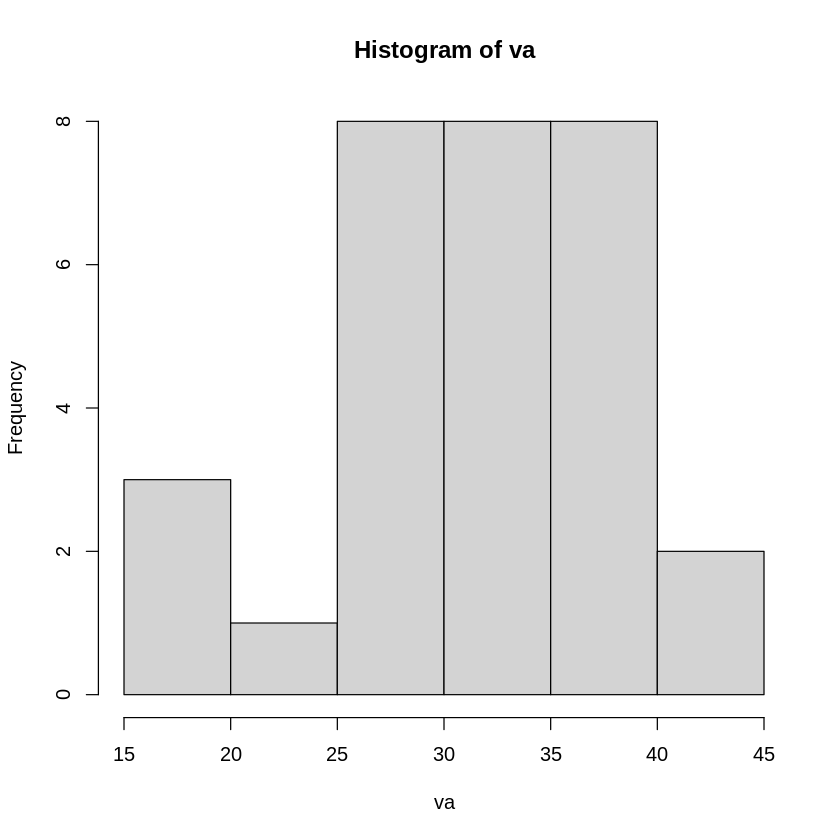

In [28]:
# Supondo que nossa variável já esteja em um data frame aqui no R, tem um comando para
# fornecer o intervalo de confiança de forma bem mais fácil
# Vamos gerar com o comando rnorm() uma variável aleatoria com média 30, desvio padrão 7,31 e n = 30
va <- rnorm(n = 30, mean = 30, sd = 7.31)
# Vamos visualizar a va gerada
hist(va)

In [29]:
# Calculando o intervalo de 95% de confiança com a distribuição t de Student com a funçao t.test()
IC <-t.test(va, conf.level = 0.95)
IC$conf.int
# Pronto, já temos o intervalo de confiança para média. Função nativa e sintética do R

[1] 28.60809 33.92248
attr(,"conf.level")
[1] 0.95

# Intervalo de confiança para a proporção

In [30]:
# Utilizando o exemplo da apostila, onde calculamos o intervalo para proporção onde 138 de n = 500 clientes realizaram a devolução do produto
# Vamos armazenar os valores em objetos
devolucoes <- 138
n <- 500
quantil_95 <-qnorm(0.975)
proporcao_devolucoes <- devolucoes/n
# Aplicando a fórmula vista na apostila fica:
Limite_Superior_prop <-
 proporcao_devolucoes + quantil_95 *
 sqrt(proporcao_devolucoes*(1-proporcao_devolucoes)/n)
Limite_Inferior_prop <-
 proporcao_devolucoes - quantil_95 *
 sqrt(proporcao_devolucoes*(1-proporcao_devolucoes)/n)
paste("Com 95% de confiança, podemos afirmar que a proporção varia entre",Limite_Inferior_prop," e ",Limite_Superior_prop)

[1] "Com 95% de confiança, podemos afirmar que a proporção varia entre 0.236817971788424  e  0.315182028211576"

In [31]:
# Podemos obter o intervalo de confiança para proporção mais fácil pela função prop.test()
IC_proporcao <- prop.test(x = 138, n = 500, conf.level = 0.95)
IC_proporcao$conf.int

[1] 0.2376893 0.3178132
attr(,"conf.level")
[1] 0.95

# Intervalo de confiança para média via Bootstrap

In [32]:
# Vamos gerar uma va seguindo uma distribuição qui-quadrado
va <- rchisq(n = 60, df = 3)

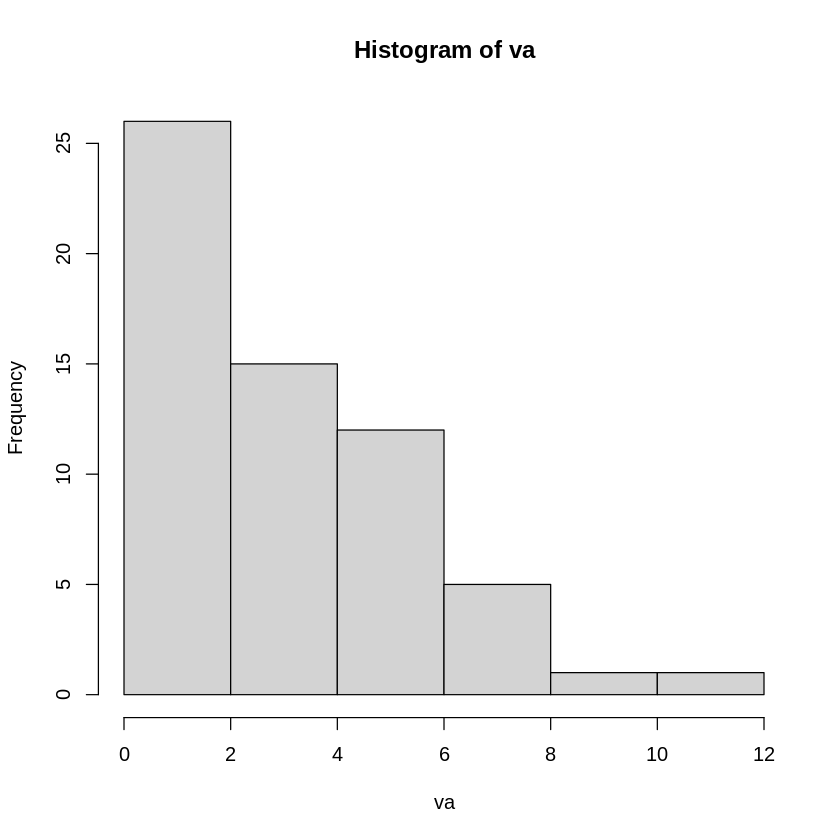

In [33]:
# Observe o quão assimétrica é a va
hist(va)

In [34]:
# Inicializa variaveis
medias <- c() #Essa variável é um vetor para armazenar a média de cada subamostra bootstrap

In [35]:
R <- 1000 #Numero de subamostras extraídas para gerar a distribuição amostral de médias #bootstrap
for (i in 1:R) {#Realiza uma subamostragem aleatória com reposição da va
 reamostra <- sample(va, size = 50, replace = T)
 #Armazena a média da subamostra
 medias[i] <- mean(reamostra)
}

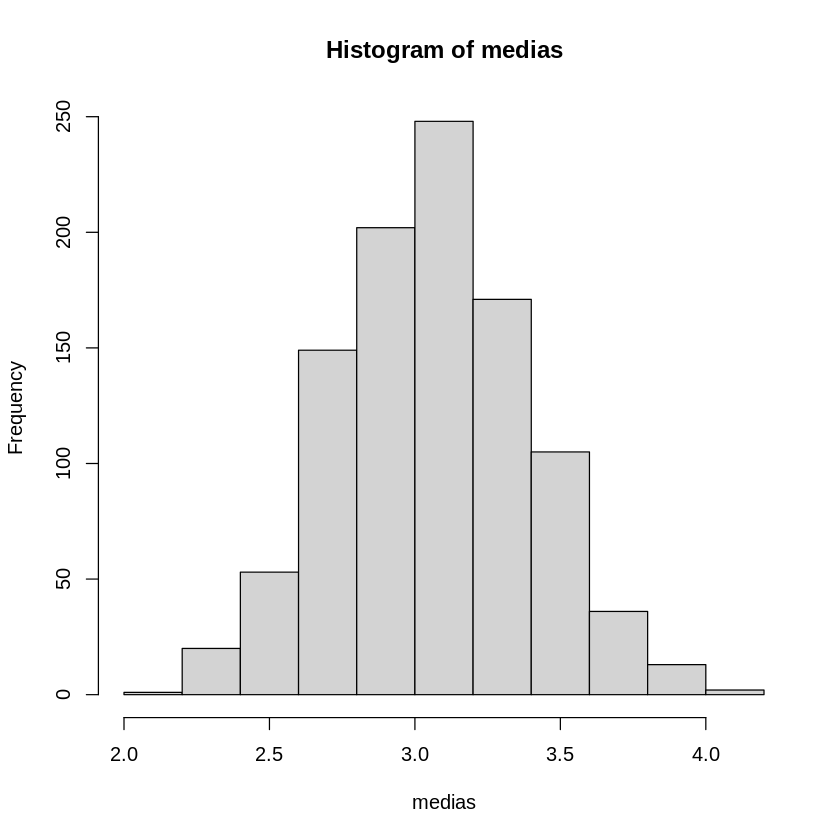

In [36]:
# Distribuicao das médias das subamostras (distribuição amostral da média da va)
hist(medias)

In [37]:
# Observe que mesmo a variável original não seguindo uma distribuição normal, o Teorema Central do Limite nos garante que a distribuição das médias 
# será normal se n é suficientemente grande
# A partir das médias geradas, precisamos achar dois valores, o que corta a cauda inferior e o que corta a cauda superior da distribuição. Lembrando 
# que ela é simétrica
# Caso o intervalo desejado seja de 95% de confiança, temos que ordenar essa distribuição do menor valor para o maior e achar o valor que deixará 2,5% 
# dos dados para trás e o valor que deixará 97,5% para trás
(1-0.95)/2
1-(1-0.95)/2

[1] 0.025

[1] 0.975

In [38]:
#Visualize o intervalo de confiança via bootstrap
quantile( medias, probs = c(0.025,0.975))

2.5%    97.5% 
2.451389 3.687799

In [39]:
# Geraremos uma va com média = 30 e desvio padrão amostral =7.31 e n = 30
va <- rnorm(n = 30, mean = 30, sd = 7.31)

In [40]:
# Iremos calcular o intervalo de confiança usando o Bootstrap e também com a distribuição t de Student. Compararemos os resultados.
# Inicializa variavel para armazenar as médias de cada subamostra
medias <- c()
R <- 10000 #Numero de subamostras extraídas para gerar a distribuição amostral de médias bootstrap
for (i in 1:R) {
 #Realiza uma subamostragem aleatória com reposição da va
 reamostra <- sample(va, size = 20, replace = T)
 #Armazena a média da subamostra
 medias[i] <- mean(reamostra)
}

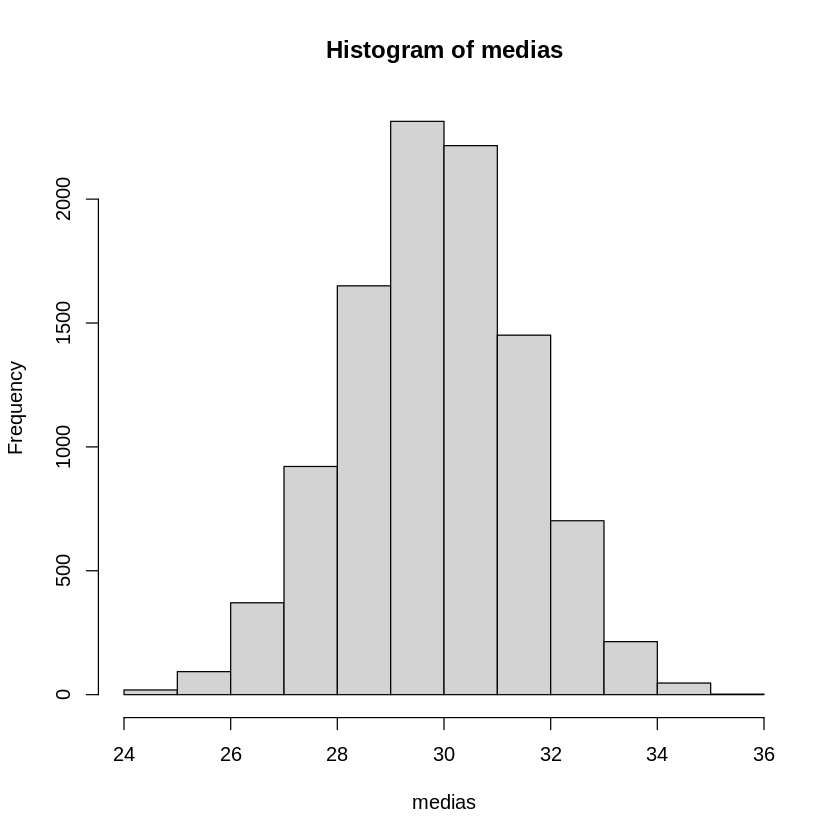

In [41]:
#Distribuicao das médias das subamostras (distribuição amostral da média da va)
hist(medias)

In [42]:
#Limites inferior e superior do intervalo pelo bootstrap
quantile( medias, probs = c(0.025,0.975))

2.5%    97.5% 
26.53946 33.04956

In [43]:
#Limites inferior e superior do intervalo via t de Student
IC<-t.test(va, conf.level = 0.95)
IC$conf.int

[1] 27.03429 32.67454
attr(,"conf.level")
[1] 0.95